In [1]:
import pandas as pd

df = pd.read_csv('results.tsv', delim_whitespace=True, header=0)
df.head()

,1369167,0.15873015873015872,0.17777777777777778,0.15277777777777776,0.13095238095238096,0.11428571428571428,0.20833333333333334,0.09523809523809523,0.15,0.16666666666666666,...,0.19444444444444442,0.6666666666666666.1,0.5,0.6666666666666666.2,0.5.1,0.27777777777777773,0.6666666666666666.3,0.2222222222222222,0.16666666666666666.1,0.20370370370370372
0,3362990,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3614799,0.191667,0.402778,0.402778,0.406250,0.406250,0.281250,0.319444,0.184028,0.358333,...,0.583333,0.750000,0.531250,0.341667,0.525000,0.550000,0.402778,0.416667,0.402778,0.364583
2,1196769,0.158995,0.611111,0.750000,0.625000,0.666667,0.597222,0.722222,0.307143,0.533333,...,0.666667,0.666667,0.666667,0.750000,0.625000,0.638889,0.638889,0.722222,0.666667,0.638889
3,1469522,0.304762,0.706349,0.778571,0.678571,0.674603,0.579762,0.179762,0.263492,0.174546,...,0.767857,0.589286,0.689286,0.603571,0.423810,0.748016,0.432143,0.638265,0.415873,0.490873
4,1499659,0.268376,0.660256,0.602564,0.544872,0.615385,0.557692,0.336325,0.318803,0.098077,...,0.661538,0.638462,0.679487,0.700855,0.635897,0.497436,0.648718,0.495604,0.584615,0.523932


In [113]:
import matplotlib
import matplotlib.pyplot as plt
import tikzplotlib

# [FIX] AttributeError: 'Line2D' object has no attribute '_us_dashSeq'

from matplotlib.lines import Line2D
from matplotlib.legend import Legend
Line2D._us_dashSeq    = property(lambda self: self._dash_pattern[1])
Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
Legend._ncol = property(lambda self: self._ncols, lambda self, value: setattr(self, "_ncols", value))

# [FIX] AttributeError: 'Legend' object has no attribute '_ncol'
    
def tikzplotlib_fix_ncols(obj):
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    if hasattr(obj, 'gcf'):
        fig = obj.gcf()
        for ax in fig.get_axes():
            if hasattr(ax, 'legend_') and ax.legend_ is not None:
                if hasattr(ax.legend_, "_ncols"):
                    ax.legend_._ncol = ax.legend_._ncols
    else:
        for child in obj.get_children():
            tikzplotlib_fix_ncols(child)


Number of unique users in the dataset: 132
Mean ± Variance of MRR-C for each Poison level:
  Poison         result
0     0%  0.621 ± 0.015
1    10%  0.608 ± 0.017
3    20%  0.593 ± 0.015
4    50%  0.342 ± 0.013
5    80%  0.169 ± 0.003
2   100%  0.159 ± 0.003


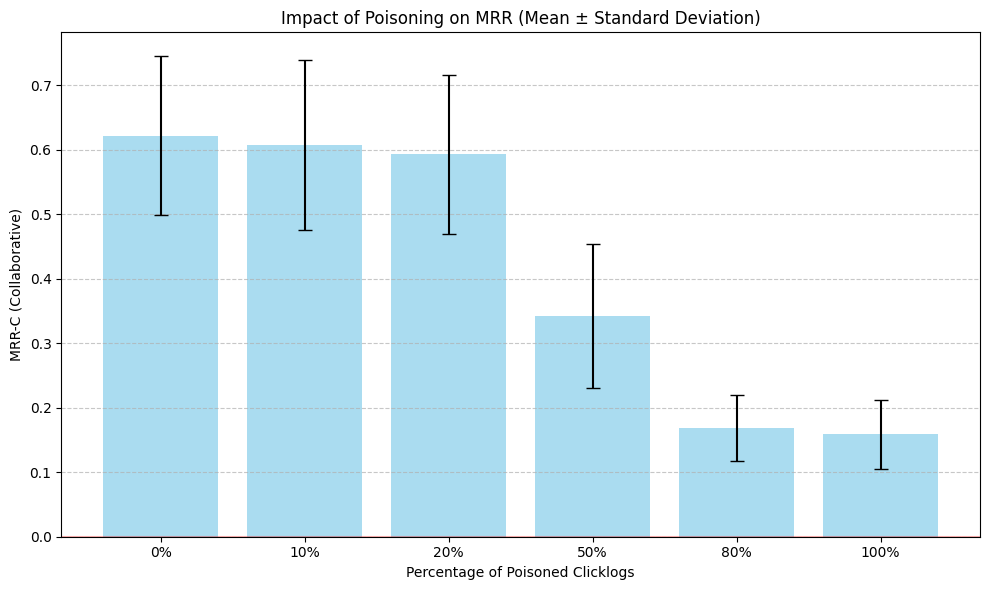

In [37]:
# Group by Poison level and calculate mean and variance of MRR-C
poison_stats = df.groupby('Poison')['MRR-C'].agg(['mean', 'var']).reset_index()

# Define the order for poison levels
poison_order = ['0%', '10%', '20%', '50%', '80%', '100%']

# Sort the dataframe according to the defined order
poison_stats['Poison'] = pd.Categorical(poison_stats['Poison'], categories=poison_order, ordered=True)
poison_stats = poison_stats.sort_values('Poison')

# Format the results as mean ± variance
poison_stats['result'] = poison_stats['mean'].round(3).astype(str) + ' ± ' + poison_stats['var'].round(3).astype(str)

# Count the number of unique users in the dataset
num_users = df['UserID'].nunique()
print(f"Number of unique users in the dataset: {num_users}")


# Display the results
print("Mean ± Variance of MRR-C for each Poison level:")
print(poison_stats[['Poison', 'result']])

# Create a bar plot to visualize the results
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
bars = plt.bar(poison_stats['Poison'], poison_stats['mean'], yerr=np.sqrt(poison_stats['var']), 
               capsize=5, alpha=0.7, color='skyblue')

plt.title('Impact of Poisoning on MRR (Mean ± Standard Deviation)')
plt.xlabel('Percentage of Poisoned Clicklogs')
plt.ylabel('MRR-C (Collaborative)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.tight_layout()


plt.tight_layout()
tikzplotlib_fix_ncols(plt)
tikzplotlib.save("poison_impact_plot.tex", axis_width=r'\columnwidth', axis_height=r'6cm')



In [34]:
# Calculate mean and standard deviation for specified columns grouped by Poison level
columns_to_analyze = ['MRR-C', 'Δ-C']

# Define the order for poison levels
poison_order = ['0%', '10%', '20%', '50%', '80%', '100%']

# Calculate mean for each poison level
mean_stats = df.groupby(['Poison'])[columns_to_analyze].mean().reset_index()
mean_stats['Poison'] = pd.Categorical(mean_stats['Poison'], categories=poison_order, ordered=True)
mean_stats = mean_stats.sort_values('Poison')

# Calculate standard deviation for each poison level
std_stats = df.groupby(['Poison'])[columns_to_analyze].std().reset_index()
std_stats['Poison'] = pd.Categorical(std_stats['Poison'], categories=poison_order, ordered=True)
std_stats = std_stats.sort_values('Poison')

# Create a formatted table with mean ± std
result_stats = mean_stats.copy()
for col in columns_to_analyze:
    result_stats[col] = mean_stats[col].apply(lambda x: f"{x:.3f}").astype(str) + ' ± ' + std_stats[col].apply(lambda x: f"{x:.3f}").astype(str)

# Display the results with mean ± standard deviation
result_stats

,Poison,MRR-C,Δ-C
0,0%,0.633 ± 0.120,0.150 ± 0.143
1,10%,0.621 ± 0.130,0.137 ± 0.153
3,20%,0.604 ± 0.123,0.120 ± 0.140
4,50%,0.342 ± 0.117,-0.141 ± 0.180
5,80%,0.167 ± 0.050,-0.316 ± 0.165
2,100%,0.157 ± 0.052,-0.326 ± 0.174


In [44]:
# Load the semantica vs random comparison data
semantica_vs_random = pd.read_csv('semantica_vs_random.tsv', delim_whitespace=True, header=0)

# Display the first few rows to verify the data
print("Semantica vs Random Comparison Data:")
semantica_vs_random.head()

# Calculate summary statistics
summary_stats = semantica_vs_random.describe()

# Calculate mean and standard deviation for each MRR type
mrr_columns = ['MRR-L', 'MRR-R', 'MRR-S']
mrr_stats = {
    'Mean': semantica_vs_random[mrr_columns].mean(),
    'Std': semantica_vs_random[mrr_columns].std()
}

# Create a DataFrame for the statistics
mrr_stats_df = pd.DataFrame(mrr_stats)
print("\nMRR Statistics (Mean ± Std):")
for col in mrr_columns:
    print(f"{col}: {mrr_stats_df.loc[col, 'Mean']:.3f} ± {mrr_stats_df.loc[col, 'Std']:.3f}")


Semantica vs Random Comparison Data:

MRR Statistics (Mean ± Std):
MRR-L: 0.465 ± 0.133
MRR-R: 0.627 ± 0.123
MRR-S: 0.625 ± 0.128


In [1]:
# Load the AOL dataset document file
import pandas as pd
import json
from pathlib import Path

# Define the path to the AOL dataset document file
file_path = '/Users/marcel/Documents/Tribler Datasets/.ir_datasets/aol-ia/downloaded_docs/0.jsonl'

# Check if the file exists
if Path(file_path).exists():
    # Read the JSONL file line by line
    docs = []
    with open(file_path, 'r') as f:
        for line in f:
            try:
                docs.append(json.loads(line))
            except json.JSONDecodeError:
                print(f"Error decoding JSON line: {line}")
    
    # Convert to DataFrame
    docs_df = pd.DataFrame(docs)
    
    # Display information about the loaded data
    print(f"Loaded {len(docs_df)} documents from AOL dataset")
    print("\nDataFrame columns:")
    print(docs_df.columns.tolist())
    
    # Display the first few rows
    print("\nFirst 5 rows:")
    display(docs_df.head())
    
    # Display basic statistics
    print("\nBasic statistics:")
    if 'body' in docs_df.columns:
        docs_df['body_length'] = docs_df['body'].apply(lambda x: len(x) if isinstance(x, str) else 0)
        print(f"Average document length: {docs_df['body_length'].mean():.2f} characters")
    
    # Count missing values
    print("\nMissing values per column:")
    print(docs_df.isna().sum())
else:
    print(f"File not found: {file_path}")
    print("Please check the path and make sure the file exists.")


Loaded 95362 documents from AOL dataset

DataFrame columns:
['doc_id', 'url', 'wb_url', 'title', 'text']

First 5 rows:


,doc_id,url,wb_url,title,text
0,078c6229933e,http://www.fasteningproducts.net,https://web.archive.org/web/20060110225946/htt...,Home,Welcome to Fastening Products of LancasterFast...
1,0585fcd2de12,http://www.maseratidealers.com,https://web.archive.org/web/20060409061055/htt...,Maserati,
2,052d3ed297c5,http://www.thing-e.info,https://web.archive.org/web/20140106112103/htt...,,
3,01fce9745047,http://www.eides.com,https://web.archive.org/web/20060403005852/htt...,Eide 's Entertainment,WELCOME TO EIDE 'S ENTERTAINMENT Your complete...
4,06994876352a,http://xzpooping.splinder.com,https://web.archive.org/web/20060206163029/htt...,"-=E Pooping PORN - women , pants anal girl and...",pooping mpegs pooping pants scat bitch xxx fre...



Basic statistics:

Missing values per column:
doc_id    0
url       0
wb_url    0
title     0
text      0
dtype: int64


In [2]:
# Calculate word count statistics for the text column
if 'text' in docs_df.columns:
    # Count words in each document
    docs_df['word_count'] = docs_df['text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
    
    # Calculate statistics
    max_words = docs_df['word_count'].max()
    avg_words = docs_df['word_count'].mean()
    median_words = docs_df['word_count'].median()
    
    # Display results
    print("\nWord count statistics for 'text' column:")
    print(f"Maximum word count: {max_words}")
    print(f"Average word count: {avg_words:.2f}")
    print(f"Median word count: {median_words}")
    
    # Show distribution of word counts
    print("\nWord count distribution:")
    print(docs_df['word_count'].describe())
    
    # Find the document with the maximum word count
    max_word_doc = docs_df.loc[docs_df['word_count'].idxmax()]
    print("\nDocument with maximum word count:")
    print(f"Document ID: {max_word_doc.get('doc_id', 'N/A')}")
    print(f"URL: {max_word_doc.get('url', 'N/A')}")
    print(f"Title: {max_word_doc.get('title', 'N/A')}")
else:
    print("\nNo 'text' column found in the dataset.")



Word count statistics for 'text' column:
Maximum word count: 226523
Average word count: 602.43
Median word count: 223.0

Word count distribution:
count     95362.000000
mean        602.428294
std        2799.350831
min           0.000000
25%          54.000000
50%         223.000000
75%         511.000000
max      226523.000000
Name: word_count, dtype: float64

Document with maximum word count:
Document ID: 0a3019944ff7
URL: http://thisdayinhistory.blogspot.com
Title: This Day in History


In [10]:
import pandas as pd

# Load the data
df = pd.read_csv('some_results.tsv', delim_whitespace=True, header=0)

# Define the columns to analyze
mrr_columns = ['MRR-L', 'MRR-R', 'MRR-S']

# Calculate mean and standard deviation
means = df[mrr_columns].mean()
stds = df[mrr_columns].std()

# Print results
print("MRR Statistics (Mean ± Std):")
for col in mrr_columns:
    print(f"{col}: {means[col]:.3f} ± {stds[col]:.3f}")

MRR Statistics (Mean ± Std):
MRR-L: 0.525 ± 0.068
MRR-R: 0.375 ± 0.128
MRR-S: 0.376 ± 0.107


In [11]:
import pandas as pd
import numpy as np

# Load the user embeddings data
user_embeddings_df = pd.read_csv('semantica/semantica_tree_user_embeddings.csv', index_col=0)

print(user_embeddings_df.head())


    AnonID                                          embedding
0  4071847  [ 7.44519755e-03 -3.33327875e-02  2.94009950e-...
1  3052241  [-1.30685195e-02 -3.08464132e-02  2.03749221e-...
2  1523743  [ 9.20531247e-03 -3.41259651e-02  3.17560025e-...
3  5926042  [ 4.70411032e-03 -2.31376663e-02  3.36696580e-...
4  1747127  [-3.42316995e-03 -2.58689430e-02  2.53010374e-...


In [ ]:
import pandas as pd
import numpy as np
import re
import lmdb
import pickle
import os

# Load the user embeddings data
user_embeddings_df = pd.read_csv('semantica/semantica_tree_user_embeddings.csv', index_col=0)

# Create LMDB environment
db_path = 'user_embeddings.lmdb'
map_size = 10 * 1024 * 1024 * 1024  # 10GB should be enough for user embeddings

# Open the database
env = lmdb.open(db_path, map_size=map_size)

# Process all user embeddings and store them in the database
with env.begin(write=True) as txn:
    for index, row in user_embeddings_df.iterrows():
        user_id = row['AnonID']
        embedding_str = row['embedding']
        
        # Clean the string and convert to numpy array
        clean_str = embedding_str.strip('[]')
        values = re.split(r'\s+', clean_str)
        embedding_array = np.array([float(val) for val in values if val])
        
        # Store the embedding in the database
        txn.put(str(user_id).encode(), pickle.dumps(embedding_array))

# Close the environment
env.close()

print(f"Successfully created LMDB database at {db_path}")
print(f"Total users processed: {len(user_embeddings_df)}")

Successfully created LMDB database at user_embeddings.lmdb
Total users processed: 19240

Error retrieving sample user: name 'doc_id' is not defined


In [1]:
# Verify by retrieving a sample user
sample_user_id = 1523743
from utils.db import get_user_embedding

try:
    sample_embedding = get_user_embedding(sample_user_id)
    if sample_embedding is not None:
        print(f"\nVerification for user {sample_user_id}:")
        print(f"Embedding shape: {sample_embedding.shape}")
        print(f"First few values: {sample_embedding[:5]}")
    else:
        print(f"\nUser {sample_user_id} not found in the database.")
except Exception as e:
    print(f"\nError retrieving sample user: {e}")



Verification for user 1523743:
Embedding shape: (768,)
First few values: [ 0.00920531 -0.03412597  0.031756    0.02844471  0.00627908]


In [2]:
from datasets.aol4ps import load_dataset

df, _, _ = load_dataset('aol4ps')

df.head()

,AnonID,QueryIndex,QueryTime,SessionNo,DataType,DocIndex,CandiList,ClickPos
632114,2420729,q-218577,2006-03-01 00:02:05,452138,0,d-6293,d-373522\td-284542\td-278851\td-866048\td-6842...,5
183427,713071,q-70157,2006-03-01 00:02:25,131654,0,d-26656,d-469101\td-325736\td-52859\td-125305\td-60369...,5
221168,861363,q-83973,2006-03-01 00:02:42,158371,0,d-257724,d-479809\td-169720\td-309620\td-118537\td-4432...,5
558208,2126555,q-1092,2006-03-01 00:03:05,398884,0,d-2028,d-557711\td-20622\td-42821\td-290010\td-938913...,5
183428,713071,q-70158,2006-03-01 00:03:15,131654,0,d-28296,d-906561\td-158539\td-244003\td-358791\td-1252...,5


In [4]:
df['ClickPos'].value_counts()

5    239436
0    111215
1     38546
2     21179
3     15052
4     10634
6      7313
7      6424
8      5621
9      5250
Name: ClickPos, dtype: int64

In [8]:
import numpy as np

df['ReciprocalRank'] = 1 / (df['ClickPos'] + 1)
mean_reciprocal_rank = df['ReciprocalRank'].mean()

print(f"BM25 MRR: {mean_reciprocal_rank:.4f}")
print("Random MRR: ", np.mean([1 / i for i in range(1, 11)]))
print("Worst case MRR: ", 1 / 10)

BM25 MRR: 0.4045
Random MRR:  0.2928968253968254
Worst case MRR:  0.1


# Semantica Sanity Check

In [1]:
from datasets.aol4ps import load_dataset
from utils.db import get_doc_embedding
from semantica.graph import get_neighbors
import random
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(a, b):
    """Calculate cosine similarity between vectors a and b, handling any array shape."""
    a_flat = np.ravel(a)
    b_flat = np.ravel(b)
    
    if norm(a_flat) == 0 or norm(b_flat) == 0:
        return 0.0
    
    return float(dot(a_flat, b_flat)/(norm(a_flat)*norm(b_flat)))

df, queries_df, docs_df = load_dataset('AOL4PS')
all_users = df['AnonID'].unique()

def get_user_embedding(user_id):
    doc_ids = df[df['AnonID'] == user_id]['DocIndex'].unique()
    embeddings = [get_doc_embedding(doc_id) for doc_id in doc_ids]
    embeddings = [emb for emb in embeddings if emb is not None]
    return np.mean(embeddings, axis=0)

for user_id in all_users:
    user_emb = get_user_embedding(user_id)
    if len(get_neighbors(user_id)) == 0:
        continue

    semantica_neighbors_avg_emb = np.mean([get_user_embedding(neighbor) for neighbor in get_neighbors(user_id)], axis=0)
    random_neighbors_avg_emb = np.mean([get_user_embedding(neighbor) for neighbor in random.sample(list(all_users), len(get_neighbors(user_id)))], axis=0)

    semantic_similarity = cosine_similarity(user_emb, semantica_neighbors_avg_emb)
    random_similarity = cosine_similarity(user_emb, random_neighbors_avg_emb)

    print(f"User={user_id}, N={len(get_neighbors(user_id))}, \tSemantica neighborhood similarity: {semantic_similarity:.3f}, Random neighborhood similarity: {float(random_similarity):.3f}")


/Users/marcel/anaconda3/envs/decpy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/marcel/anaconda3/envs/decpy/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/marcel/anaconda3/envs/decpy/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


User=2420729, N=75, 	Semantica neighborhood similarity: nan, Random neighborhood similarity: 0.988
User=713071, N=41, 	Semantica neighborhood similarity: 0.998, Random neighborhood similarity: 0.997
User=861363, N=91, 	Semantica neighborhood similarity: 0.990, Random neighborhood similarity: 0.988
User=2126555, N=38, 	Semantica neighborhood similarity: 0.995, Random neighborhood similarity: 0.994
User=461601, N=49, 	Semantica neighborhood similarity: nan, Random neighborhood similarity: 0.983
User=556178, N=29, 	Semantica neighborhood similarity: 0.998, Random neighborhood similarity: 0.996
User=3013856, N=29, 	Semantica neighborhood similarity: 0.996, Random neighborhood similarity: 0.994
User=1662860, N=42, 	Semantica neighborhood similarity: 0.996, Random neighborhood similarity: 0.993
User=275721, N=33, 	Semantica neighborhood similarity: nan, Random neighborhood similarity: 0.956
User=908731, N=35, 	Semantica neighborhood similarity: 0.998, Random neighborhood similarity: 0.995
Us

KeyboardInterrupt: 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from autonomos.datasets.aol import load_dataset

df = load_dataset()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1958633,0.340013,0.625463,0.583796,0.581481,0.461442,0.543287,0.461111,0.468056,0.424306,...,1,2,1,1,2,1,1,1,1,0
1,1270972,0.571429,1.000000,0.583333,0.625000,0.216667,0.175000,0.175000,0.300000,0.216667,...,1,1,0,0,0,0,0,0,0,0
2,892003,0.569591,0.611464,0.614815,0.671340,0.505144,0.463316,0.174618,0.422663,0.381276,...,1,0,0,0,0,0,0,0,0,0
3,3613173,0.128571,0.245370,0.375000,0.666667,0.583333,0.245370,0.666667,0.500000,0.555556,...,2,3,2,2,1,1,3,2,4,5
4,2648672,0.719521,0.750307,0.241756,0.291347,0.191603,0.205863,0.276549,0.200870,0.167422,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Load the poisoning results from TSV file
poison_results = pd.read_csv('results.tsv', sep='\t', header=None)
poison_results.drop_duplicates(subset=[poison_results.columns[0]], inplace=True)
poison_results.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,2392419,0.408333,0.464286,0.464286,0.547619,0.492063,0.541667,0.500000,0.533333,0.408333,...,1,1,2,1,1,1,1,2,1,1
1,993658,0.495556,0.900000,0.900000,0.900000,0.900000,0.668571,0.460000,0.280000,0.130000,...,2,1,1,1,1,1,1,1,1,1
2,117290,0.217143,0.516667,0.218333,0.516667,1.000000,0.150476,0.165238,0.220000,0.102222,...,1,1,1,2,4,2,1,2,1,1
3,1166360,0.130726,0.492063,0.386905,0.409524,0.376190,0.440476,0.576190,0.357710,0.256746,...,1,3,2,4,1,4,3,2,2,3
4,1413517,0.248413,0.564815,0.423280,0.423280,0.381481,0.244444,0.240741,0.236861,0.275132,...,6,1,2,1,1,1,1,1,1,1


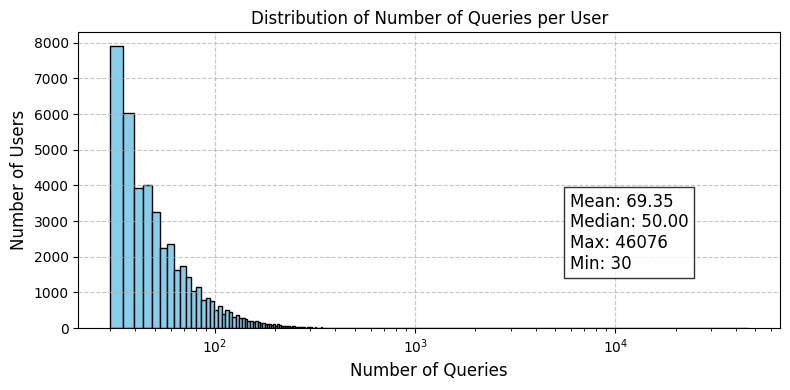

In [46]:

# Plot distribution of user to number of queries by user
user_query_counts = df.groupby('user_id').size()

plt.figure(figsize=(8, 4))
plt.hist(user_query_counts, bins=10000, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Queries per User', fontsize=12)
plt.xlabel('Number of Queries', fontsize=12)
plt.xscale('log')
plt.ylabel('Number of Users', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add some statistics as text
plt.text(0.7, 0.2, f'Mean: {user_query_counts.mean():.2f}\nMedian: {user_query_counts.median():.2f}\nMax: {user_query_counts.max()}\nMin: {user_query_counts.min()}',
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8),
         fontsize=12)

plt.tight_layout()
plt.show()

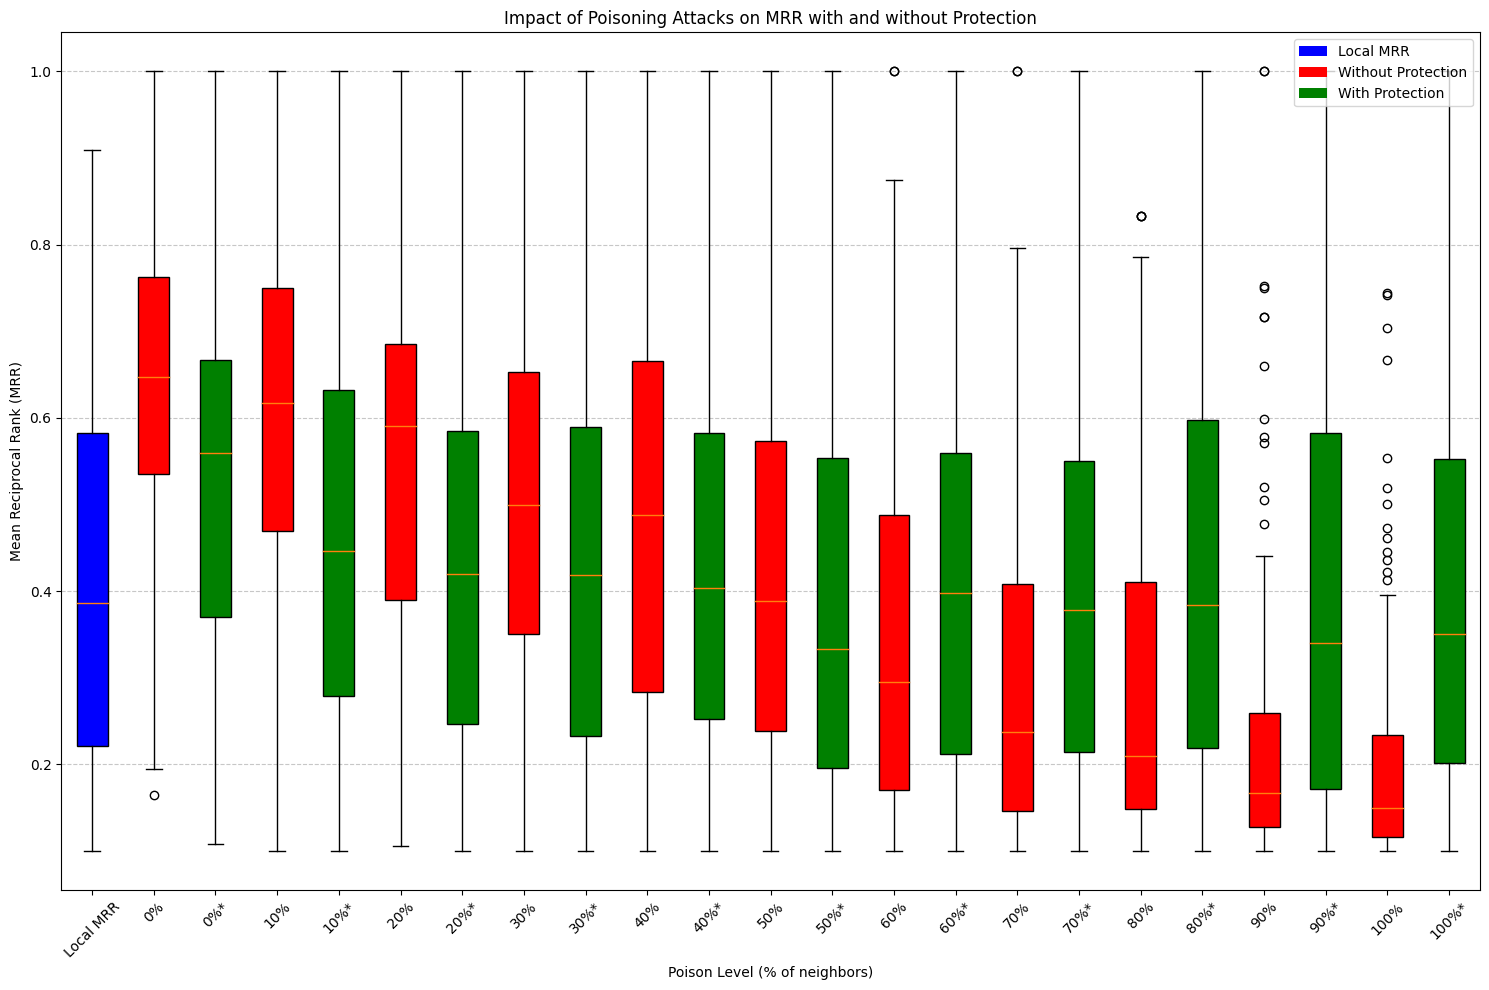

In [47]:
# Create a boxplot figure showing MRR values with paired comparisons
plt.figure(figsize=(15, 10))

# Define columns to use
local_mrr = poison_results[1]  # Local MRR (column 2)
poison_levels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Poison percentages

# Prepare data for boxplot
data_to_plot = []
labels = []

# Add local MRR as the first boxplot
data_to_plot.append(local_mrr)
labels.append('Local MRR')

# Add paired data for each poison level
for i in range(len(poison_levels)):
    # Column indices for regular and protected versions (pairs)
    regular_col = i + 2  # Starting from column 3 (index 2)
    protected_col = i + 13  # Starting from column 14 (index 13)
    
    # Add regular version (red)
    data_to_plot.append(poison_results[regular_col])
    labels.append(f'{poison_levels[i]}%')
    
    # Add protected version (green)
    data_to_plot.append(poison_results[protected_col])
    labels.append(f'{poison_levels[i]}%*')

# Create boxplot
box = plt.boxplot(data_to_plot, patch_artist=True, labels=labels)

# Set colors for boxplots
colors = ['blue']  # Local MRR in blue
for i in range(1, len(data_to_plot)):
    if i % 2 == 1:  # Regular versions (odd indices after the first)
        colors.append('red')
    else:  # Protected versions (even indices after the first)
        colors.append('green')

# Apply colors to boxes
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set labels and title
plt.xlabel('Poison Level (% of neighbors)')
plt.ylabel('Mean Reciprocal Rank (MRR)')
plt.title('Impact of Poisoning Attacks on MRR with and without Protection')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label='Local MRR'),
    Patch(facecolor='red', label='Without Protection'),
    Patch(facecolor='green', label='With Protection')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()


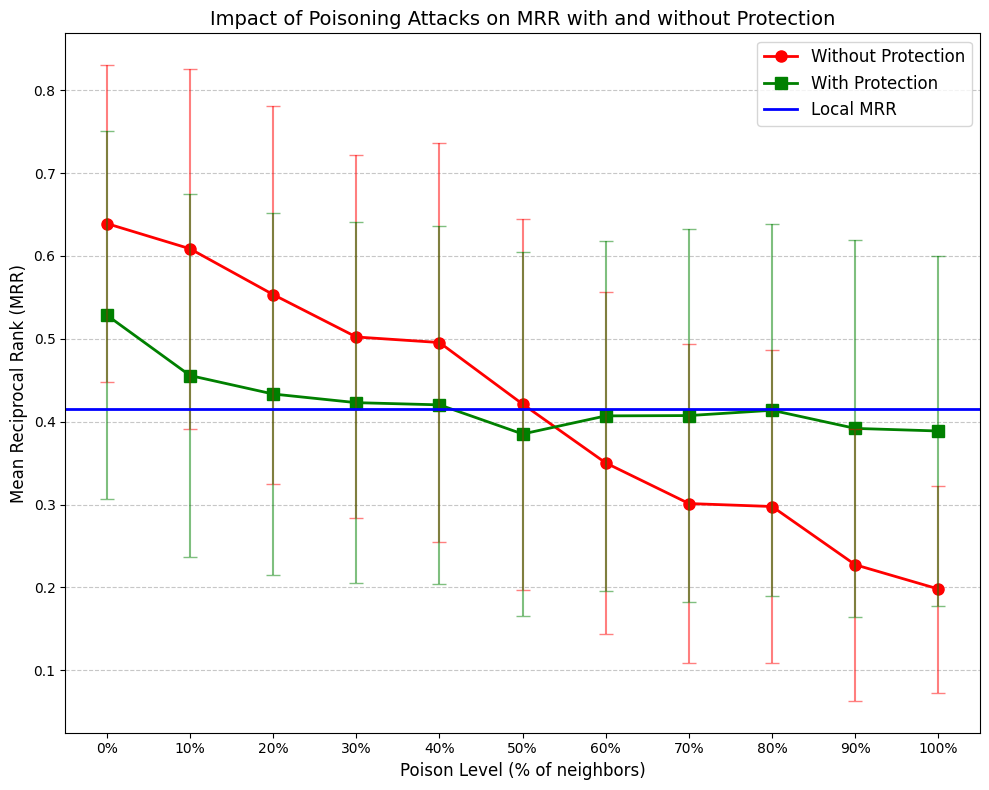

In [48]:
# Create a line plot showing MRR values with paired comparisons
plt.figure(figsize=(10, 8))

# Define columns to use
local_mrr = poison_results[1]  # Local MRR (column 2)
poison_levels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Poison percentages

# Calculate mean values for each condition
local_mean = local_mrr.mean()
regular_means = []
protected_means = []

# Calculate standard deviations for error bars
local_std = local_mrr.std()
regular_stds = []
protected_stds = []

# Collect data for each poison level
for i in range(len(poison_levels)):
    # Column indices for regular and protected versions
    regular_col = i + 2  # Starting from column 3 (index 2)
    protected_col = i + 13  # Starting from column 14 (index 13)
    
    # Calculate means
    regular_means.append(poison_results[regular_col].mean())
    protected_means.append(poison_results[protected_col].mean())
    
    # Calculate standard deviations
    regular_stds.append(poison_results[regular_col].std())
    protected_stds.append(poison_results[protected_col].std())

# Plot the lines
plt.plot(poison_levels, regular_means, 'o-', color='red', linewidth=2, markersize=8, label='Without Protection')
plt.plot(poison_levels, protected_means, 's-', color='green', linewidth=2, markersize=8, label='With Protection')

# Add error bars
plt.errorbar(poison_levels, regular_means, yerr=regular_stds, fmt='none', ecolor='red', capsize=5, alpha=0.5)
plt.errorbar(poison_levels, protected_means, yerr=protected_stds, fmt='none', ecolor='green', capsize=5, alpha=0.5)

# Add horizontal line for local MRR
plt.axhline(y=local_mean, color='blue', linestyle='-', linewidth=2, label='Local MRR')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set labels and title
plt.xlabel('Poison Level (% of neighbors)', fontsize=12)
plt.ylabel('Mean Reciprocal Rank (MRR)', fontsize=12)
plt.title('Impact of Poisoning Attacks on MRR with and without Protection', fontsize=14)

# Set x-axis ticks
plt.xticks(poison_levels, [f'{level}%' for level in poison_levels])

# Add legend
plt.legend(loc='upper right', fontsize=12)

plt.tight_layout()


,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%
Mean,2.155689,1.694611,1.640719,1.610778,1.425150,1.359281,1.365269,1.311377,1.251497,1.263473,1.227545
Min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,9.000000,8.000000,7.000000,8.000000,6.000000,5.000000,7.000000,5.000000,6.000000,6.000000,6.000000
Std,1.590545,1.450852,1.549277,1.447267,1.148111,1.071096,1.253233,1.052273,0.998303,1.042492,1.056686


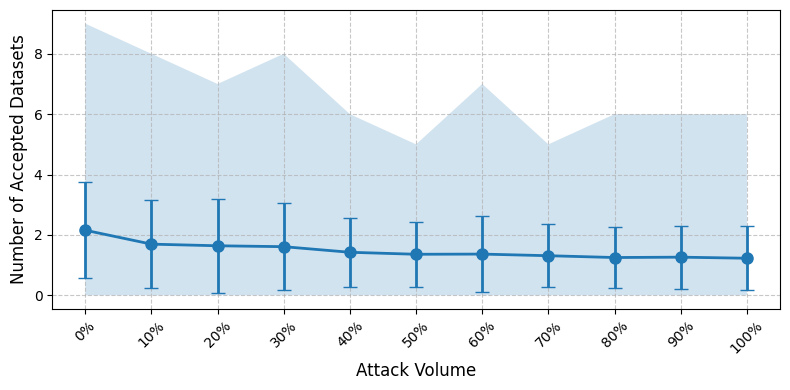

In [49]:
# Calculate statistics for columns 24-34
import pandas as pd
import numpy as np

# Assuming poison_results is a DataFrame with the results
# Extract columns 24-34 (using 0-based indexing, so columns 24-34 are indices 24-34)
cols_to_analyze = list(range(24, 35))  # 24 to 34 inclusive

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame(index=['Mean', 'Min', 'Max', 'Std'])

# Calculate statistics for each column
for i, col in enumerate(cols_to_analyze):
    if col in poison_results.columns:
        col_stats = {
            'Mean': poison_results[col].mean(),
            'Min': poison_results[col].min(),
            'Max': poison_results[col].max(),
            'Std': poison_results[col].std()
        }
        stats_df[f'{i*10}%'] = pd.Series(col_stats)

# Display the statistics table
display(stats_df)

# Create a visualization of these statistics
plt.figure(figsize=(8, 4))

# Plot mean values with error bars showing standard deviation
x = np.arange(len(cols_to_analyze))
means = [stats_df[f'{i*10}%']['Mean'] for i in range(len(cols_to_analyze)) if f'{i*10}%' in stats_df.columns]
stds = [stats_df[f'{i*10}%']['Std'] for i in range(len(cols_to_analyze)) if f'{i*10}%' in stats_df.columns]

plt.errorbar(x, means, yerr=stds, fmt='o-', capsize=5, linewidth=2, markersize=8)

# Add min and max as a shaded region
mins = [stats_df[f'{i*10}%']['Min'] for i in range(len(cols_to_analyze)) if f'{i*10}%' in stats_df.columns]
maxs = [stats_df[f'{i*10}%']['Max'] for i in range(len(cols_to_analyze)) if f'{i*10}%' in stats_df.columns]
plt.fill_between(x, mins, maxs, alpha=0.2)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Attack Volume', fontsize=12)
plt.ylabel('Number of Accepted Datasets', fontsize=12)
plt.xticks(x, [f'0%', f'10%', f'20%', f'30%', f'40%', f'50%', f'60%', f'70%', f'80%', f'90%', f'100%'], rotation=45)

plt.tight_layout()
plt.show()


In [134]:
def fixed_window(items, target_index, window_size):
    assert target_index < len(items) and target_index >= 0
    half_window = window_size // 2

    # Ensure the window does not go out of bounds
    start_index = max(0, target_index - half_window)
    end_index = min(len(items), target_index + half_window)

    # If target is close to bounds, extend the window to ensure window_size is met
    if target_index < half_window:
        end_index += half_window - target_index
    if target_index + half_window > len(items):
        start_index -= target_index + half_window - len(items)

    return items[start_index:end_index]

items = list(range(100))
assert fixed_window(items, 50, 10) == [45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
assert fixed_window(items, 5, 10) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
assert fixed_window(items, 4, 10) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
assert fixed_window(items, 0, 10) == [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
assert fixed_window(items, 90, 10) == [85, 86, 87, 88, 89, 90, 91, 92, 93, 94]
assert fixed_window(items, 97, 10) == [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
assert fixed_window(items, 99, 10) == [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

fixed_window(items, 20, 10)

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

In [6]:
shard = 2

for i in range(100):
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


In [1]:
import random
import torch
import numpy as np
from autonomos.dart.utils import split_by_qids, compute_feature_stats
from allrank.config import Config
from autonomos.dart.rank import evaluate
from autonomos.utils.data import compile_clickthrough_records
from autonomos.utils.cache import Cache
from autonomos.semantica.graph import get_neighbors
from autonomos.utils.db import get_ctrs
from autonomos.utils.attack import poison_ctrs, flip_label, rand_ctr
from autonomos.dart.utils import ClickThroughRecord
from autonomos.dart.types import Dataset
from autonomos.datasets.aol import load_dataset
from argparse import ArgumentParser
from random import sample
import sys

cache = Cache()
config = Config.from_json("./allRank_config.json")
feature_means = cache.get("feature_means")
feature_stds = cache.get("feature_stds")

In [2]:
ctrs = get_ctrs('3362990')
user_ds = split_by_qids(ctrs, context_ratio=0.8)

# Evaluate local performance
n_l = len(user_ds.context)
mrr_l = evaluate(config, user_ds, feature_means, feature_stds)

[0.0, 0.0, 0.0]
.tmp/7e3d471ea7274579b3370fa9ed94b418


In [3]:
from autonomos.dart.rank import Model

dart = Model(config)
config.data.path = './.tmp/8a9d1d10d71548759f914bf8494fe445/_normalized'
dart.train()
res = dart.test()

[0.0, 0.0, 0.0]


In [7]:
res

0.0

In [4]:
import ir_datasets

dataset = ir_datasets.load("aol-ia")

for qlog in dataset.qlogs_iter():
    if len(qlog.items) != 0:
        assert qlog.items[0].clicked == True

In [12]:

import ir_datasets

dataset = ir_datasets.load("aol-ia")
docs_store = dataset.docs_store()

docs_store.get('967858da90e2')

AolIaDoc(doc_id='967858da90e2', title='Quilting Adventures - Richmond , Virginia', text="Dumbarton Square Shopping Center 7121 Staples Mill Road Richmond , VA 23228 804-262-0005 Mon 10-6 ; Tues-Fri 10-8 ; Sat 10-5 ; Sun 1-4 Shop Blog Map and Directions February 2006 Calendar March 2006 Calendar April 2006 Calendar May 2006 Calendar Classes - Jan to May 2006 Newsletter Links Home Block of the Month Clubs starting ! * Hydrangea Lights BOM will be starting in Feburary . The sample is done and hanging in the shop . Sign up now , as kits are limited . * Calling Me Home BOM will be February through September . You will have the option of siging up for individual blocks or the whole quilt ! Kits will be limited on this one , too , so please reserve the blocks you want now . * The Harvest Spice BOM will run March-December . The number of kits are limited . We are starting a Cloth Doll Club at the shop , meeting the second Wednesday of every month at 6PM . And do n't forget about our free demos

In [23]:
import lmdb
import pickle

db = lmdb.open('data/ctrs.lmdb', map_size=2**32)
with db.begin() as txn:
    # Get the CTRs for user_id 3426571
    # Get all keys in the database
    cursor = txn.cursor()
    keys = []
    if cursor.first():
        while True:
            key = cursor.key().decode()
            keys.append(key)
            if not cursor.next():
                break
    print(f"Total keys in database: {len(keys)}")
    print("Sample keys:", keys[:10] if len(keys) > 10 else keys)
    
    # Try to get CTRs for user_id 3426571
    ctrs = pickle.loads(txn.get(str(3426571).encode())) if txn.get(str(3426571).encode()) else []

Total keys in database: 195989
Sample keys: ['1000004', '10000043', '10000063', '10000272', '1000037', '10000382', '10000416', '1000056', '10000705', '10000737']


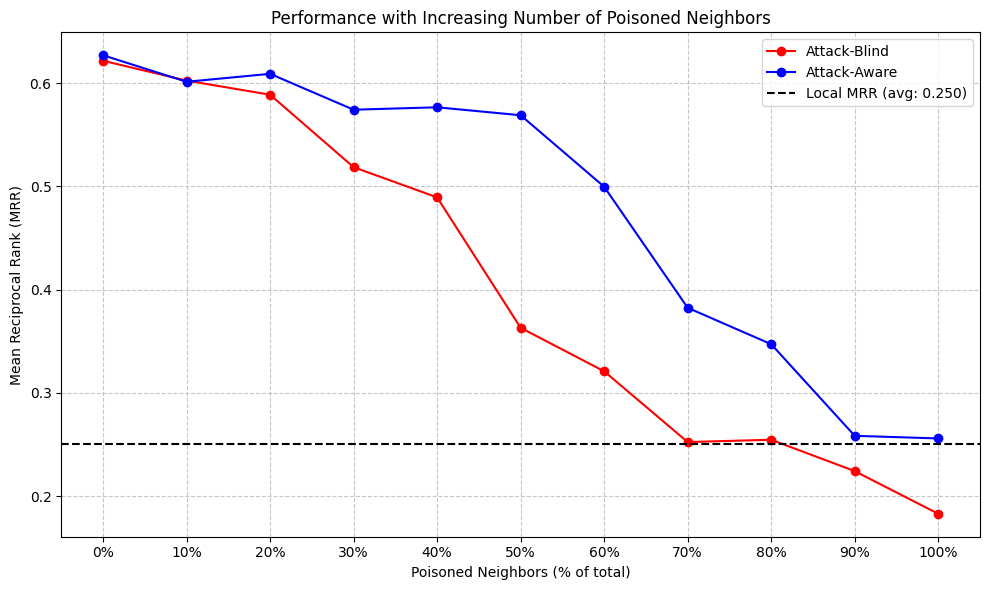

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the experiment results
shapley_df = pd.read_csv('results/experiment_shapley.tsv', sep='\t', header=None)
shapley_df = shapley_df.iloc[:100].reset_index(drop=True)


# Extract columns
user_ids = shapley_df[0]
local_mrrs = shapley_df[1]
attack_blind_mrrs = shapley_df.iloc[:, 2:13]  # Columns 2-12 (0 to 10 neighbors)
attack_aware_mrrs = shapley_df.iloc[:, 13:24]  # Columns 13-23 (0 to 10 neighbors)

# Calculate means for plotting
mean_local_mrr = local_mrrs.mean()
mean_attack_blind = attack_blind_mrrs.mean()
mean_attack_aware = attack_aware_mrrs.mean()

# Create x-axis values (0 to 10 neighbors with poisoning from 0% to 100%)
x = np.arange(11)
poison_percentages = [f"{i*10}%" for i in range(11)]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot attack-blind MRRs in red
plt.plot(x, mean_attack_blind, 'ro-', label='Attack-Blind')

# Plot attack-aware MRRs in blue
plt.plot(x, mean_attack_aware, 'bo-', label='Attack-Aware')

# Plot average local MRR as a dashed black line
plt.axhline(y=mean_local_mrr, color='black', linestyle='--', label=f'Local MRR (avg: {mean_local_mrr:.3f})')

# Add labels and title
plt.xlabel('Poisoned Neighbors (% of total)')
plt.ylabel('Mean Reciprocal Rank (MRR)')
plt.title('Performance with Increasing Number of Poisoned Neighbors')
plt.xticks(x, poison_percentages)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [55]:
# Calculate the improvement between consecutive steps
improvements = [means[1]]
for i in range(2, len(means) + 1):
    improvements.append(means[i] - means[i-1])

# Create a DataFrame to display the improvements
improvement_df = pd.DataFrame({
    'Neighbors': range(len(means)),
    'Mean MRR': means.values,
    'Improvement from Previous': improvements
})

# Format the values to 4 decimal places
improvement_df['Mean MRR'] = improvement_df['Mean MRR'].map('{:.4f}'.format)
improvement_df['Improvement from Previous'] = improvement_df['Improvement from Previous'].map('{:.4f}'.format)

# Display the table
print("Mean MRR Improvement at Each Step:")
print(improvement_df)

Mean MRR Improvement at Each Step:
    Neighbors Mean MRR Improvement from Previous
0           0   0.4365                    0.4365
1           1   0.4858                    0.0493
2           2   0.5090                    0.0231
3           3   0.5620                    0.0530
4           4   0.5957                    0.0337
5           5   0.6212                    0.0255
6           6   0.6376                    0.0164
7           7   0.6578                    0.0202
8           8   0.6671                    0.0093
9           9   0.6754                    0.0084
10         10   0.6774                    0.0019
11         11   0.6912                    0.0138
12         12   0.6908                   -0.0003
13         13   0.6967                    0.0059
14         14   0.7021                    0.0054
15         15   0.7016                   -0.0005
16         16   0.7072                    0.0056
17         17   0.7071                   -0.0001
18         18   0.7153            

# Experiment 1: Performance with increasing number of healthy datasets

In [107]:
from matplotlib.lines import Line2D
from matplotlib.legend import Legend
Line2D._us_dashSeq = property(lambda self: self._dash_pattern[1])
Line2D._us_dashOffset = property(lambda self: self._dash_pattern[0])
Legend._ncol = property(lambda self: self._ncols, lambda self, value: setattr(self, "_ncols", value))

def tikzplotlib_fix_ncols(obj):
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    if hasattr(obj, 'gcf'):
        fig = obj.gcf()
        for ax in fig.get_axes():
            if hasattr(ax, 'legend_') and ax.legend_ is not None:
                if hasattr(ax.legend_, "_ncols"):
                    ax.legend_._ncol = ax.legend_._ncols
    else:
        for child in obj.get_children():
            tikzplotlib_fix_ncols(child)

In [117]:
# Load the Shapley experiment results
shapley_df = pd.read_csv('results/experiment_shapley.tsv', sep='\t', header=None)

# The columns in this dataset are:
# - Column 0: user_id
# - Column 1: local_mrr
# - Columns 2-12: attack_blind_mrrs for 0-10 neighbors
# - Columns 13-23: attack_aware_mrrs for 0-10 neighbors
# - Following columns: shapley values for each neighbor in each scenario
# - Final columns: neighbor user_ids

# Assign column names
shapley_df.columns = ['user_id', 'local_mrr'] + \
                     [f'blind_mrr_{i}' for i in range(11)] + \
                     [f'aware_mrr_{i}' for i in range(11)] + \
                     [f'shapley_{attack_vol}_{i}' for attack_vol in range(11) for i in range(10)] + \
                     [f'neighbor_{i}' for i in range(10)]

# Extract the relevant columns for plotting
# We need to calculate the average MRR for each number of neighbors
blind_mrrs = []
aware_mrrs = []

# We have data for 0-10 neighbors, but want to show as percentages 0-100%
for i in range(11):
    blind_mrrs.append(shapley_df[f'blind_mrr_{i}'].mean())
    aware_mrrs.append(shapley_df[f'aware_mrr_{i}'].mean())

# Calculate the mean local MRR (this is constant regardless of neighbors)
mean_local_mrr = shapley_df['local_mrr'].mean()

# Create x-axis values (0% to 100% in steps of 10%)
x_percentages = [i*10 for i in range(11)]  # 0, 10, 20, ..., 100

# Calculate profitability of non-attackers as percentage of total positive value
profitability_df = pd.DataFrame(index=x_percentages, columns=['Profitability of Honest Peers (%)'])

for attack_vol in range(11):  # 0% to 100% in steps of 10%
    # Get all Shapley values for this attack volume
    shapley_values = []
    for i in range(10):
        col_name = f'shapley_{attack_vol}_{i}'
        shapley_values.append(shapley_df[col_name].mean())
    
    # Convert negative values to 0
    shapley_values = [max(0, val) for val in shapley_values]
    
    # Calculate total positive value
    total_positive_value = sum(shapley_values)
    
    # Calculate sum of non-attacker values (values after the attack volume)
    non_attacker_indices = list(range(attack_vol, 10))
    non_attacker_values = sum([shapley_values[i] for i in non_attacker_indices]) if non_attacker_indices else 0
    
    # Calculate profitability as percentage
    if total_positive_value > 0:
        profitability = (non_attacker_values / total_positive_value) * 100
    else:
        profitability = 0
    
    profitability_df.loc[attack_vol*10, 'profitability'] = profitability

fig, ax1 = plt.subplots(figsize=(3.39, 3.39*0.618))

# Plot MRR values on the first y-axis with different markers and line styles for b/w compatibility
# but also keep colors for color displays
ax1.plot(x_percentages, blind_mrrs, 'o-', color='red', markerfacecolor='white', label='Attack-Blind')
ax1.plot(x_percentages, aware_mrrs, 's--', color='blue', markerfacecolor='black', label='Attack-Aware')
ax1.axhline(y=mean_local_mrr, linestyle=':', color='black', linewidth=2, label='Local-only')
ax1.set_xlabel('Attack Volume (%)')
ax1.set_ylabel('MRR', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for profitability
ax2 = ax1.twinx()
ax2.plot(x_percentages, profitability_df['profitability'], '^-.', color='green', markerfacecolor='gray', label='Profitability of Honest Peers')
ax2.set_ylabel('Profitability (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
# Increase the y-axis limit for profitability to make top points more visible
max_profitability = profitability_df['profitability'].max()
ax2.set_ylim(0, 103)

# Add title and grid
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks(x_percentages)

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower left')

plt.tight_layout()

tikzplotlib_fix_ncols(fig)
tikzplotlib.save("results/tex/profitability.tex", axis_width=r'\columnwidth', axis_height=r'6cm')

plt.show()


/var/folders/fz/h_r0ypg14n9ck7sr91hf8ntm0000gn/T/ipykernel_83855/634834813.py:97: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


    Attack % Neighbor 0 Neighbor 1 Neighbor 2 Neighbor 3 Neighbor 4  \
0          0   6.006951   6.256586     6.2908   6.845425   6.542761   
1         10   0.463398   6.890205   6.819905   8.036625   6.910649   
2         20  -0.363157   0.114362   7.669086   8.197903   8.391351   
3         30  -0.857749  -0.095933  -0.644645   8.708193    8.19735   
4         40  -1.624983   -0.64036  -0.227892  -1.752058   9.539351   
5         50  -1.290247  -0.432554  -0.469348  -0.808317  -0.886923   
6         60  -1.336758   -0.23811   0.669601  -1.521561  -1.006227   
7         70  -0.669002   0.042683   1.233697  -0.188211   0.362448   
8         80   0.229398   0.850784   0.800842   0.655155   0.814587   
9         90   0.622549   1.742572   1.422953   1.267783    0.92194   
10       100   1.199377   2.125312   1.939159   1.557826   1.500236   

   Neighbor 5 Neighbor 6 Neighbor 7 Neighbor 8 Neighbor 9  
0    6.576921   6.917016   5.874083    6.51187   6.587158  
1    6.938553    6.99095   

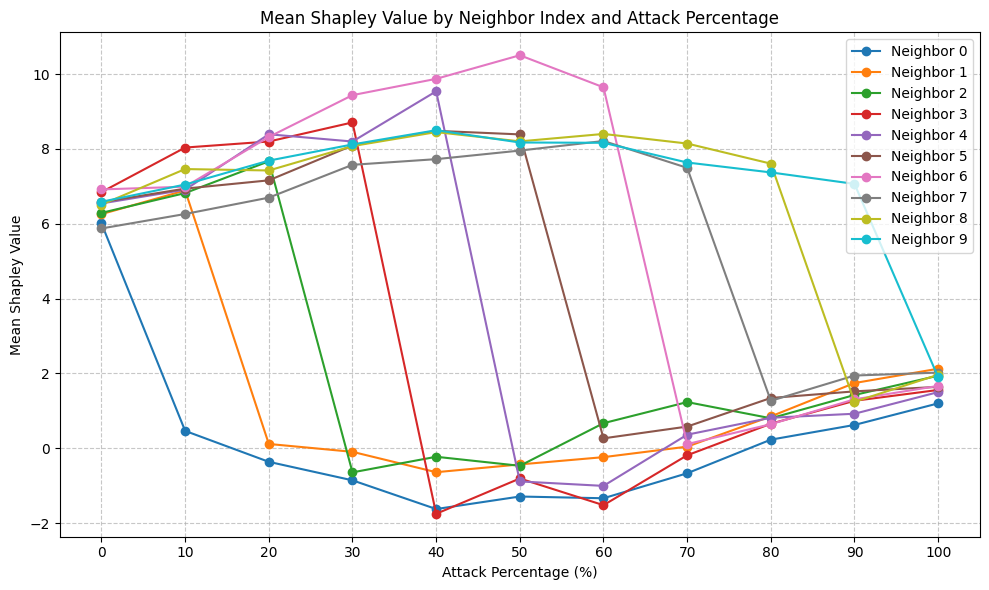

In [63]:
# Create a DataFrame to display the mean Shapley values for each neighbor index across attack percentages
shapley_by_neighbor = pd.DataFrame(index=x_percentages, columns=[f'Neighbor {i}' for i in range(10)])

# Calculate the mean Shapley value for each neighbor index at each attack percentage
for attack_vol in range(11):  # 0% to 100% in steps of 10%
    for i in range(10):  # For each neighbor index
        col_name = f'shapley_{attack_vol}_{i}'
        shapley_by_neighbor.loc[attack_vol*10, f'Neighbor {i}'] = shapley_df[col_name].mean()

# Add attack percentage as a column instead of index for better display
shapley_by_neighbor.reset_index(inplace=True)
shapley_by_neighbor.rename(columns={'index': 'Attack %'}, inplace=True)

# Display the table
print(shapley_by_neighbor)

# Plot the mean Shapley values for each neighbor
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(x_percentages, shapley_by_neighbor[f'Neighbor {i}'], 'o-', label=f'Neighbor {i}')

plt.xlabel('Attack Percentage (%)')
plt.ylabel('Mean Shapley Value')
plt.title('Mean Shapley Value by Neighbor Index and Attack Percentage')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(x_percentages)
plt.tight_layout()
plt.show()


